In [54]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py
from plotly.subplots import make_subplots

In [29]:

df=pd.read_csv('csse_covid_19_daily_reports_us.csv')
df.columns


Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [3]:
df.count()

Province_State          58
Country_Region          58
Last_Update             58
Lat                     56
Long_                   56
Confirmed               58
Deaths                  58
Recovered               42
Active                  58
FIPS                    58
Incident_Rate           56
People_Tested           56
People_Hospitalized     33
Mortality_Rate          57
UID                     58
ISO3                    58
Testing_Rate            56
Hospitalization_Rate    33
dtype: int64

In [4]:
df.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-05-21 02:32:54  32.3182  -86.9023   
1          Alaska             US  2020-05-21 02:32:54  61.3707 -152.4044   
2  American Samoa             US  2020-05-21 02:32:54 -14.2710 -170.1320   
3         Arizona             US  2020-05-21 02:32:54  33.7298 -111.4312   
4        Arkansas             US  2020-05-21 02:32:54  34.9697  -92.3731   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0      13052     522        NaN  12530.0     1     266.194321       164450.0   
1        401      10      352.0     39.0     2      54.815493        37045.0   
2          0       0        NaN      0.0    60       0.000000          124.0   
3      14906     747     3773.0  10386.0     4     204.788838       165435.0   
4       5003     107     3852.0   1044.0     5     165.782801        96258.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0               1493.0        3.999387  84000001  USA   3353.942386   
1                  NaN        2.493766  84000002  USA   5063.940017   
2                  NaN             NaN        16  ASM    222.857246   
3               1792.0        5.011405  84000004  USA   2272.859351   
4                535.0        2.138717  84000005  USA   3189.670370   

   Hospitalization_Rate  
0             11.438860  
1                   NaN  
2                   NaN  
3             12.022005  
4             10.693584

In [5]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [6]:
df

Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-05-21 02:32:54  32.3182   
1                     Alaska             US  2020-05-21 02:32:54  61.3707   
2             American Samoa             US  2020-05-21 02:32:54 -14.2710   
3                    Arizona             US  2020-05-21 02:32:54  33.7298   
4                   Arkansas             US  2020-05-21 02:32:54  34.9697   
5                 California             US  2020-05-21 02:32:54  36.1162   
6                   Colorado             US  2020-05-21 02:32:54  39.0598   
7                Connecticut             US  2020-05-21 02:32:54  41.5978   
8                   Delaware             US  2020-05-21 02:32:54  39.3185   
9           Diamond Princess             US  2020-05-21 02:32:54      NaN   
10      District of Columbia             US  2020-05-21 02:32:54  38.8974   
11                   Florida             US  2020-05-21 02:32:54  27.7663   
12                   Georgia             US  2020-05-21 02:32:54  33.0406   
13            Grand Princess             US  2020-05-21 02:32:54      NaN   
14                      Guam             US  2020-05-21 02:32:54  13.4443   
15                    Hawaii             US  2020-05-21 02:32:54  21.0943   
16                     Idaho             US  2020-05-21 02:32:54  44.2405   
17                  Illinois             US  2020-05-21 02:32:54  40.3495   
18                   Indiana             US  2020-05-21 02:32:54  39.8494   
19                      Iowa             US  2020-05-21 02:32:54  42.0115   
20                    Kansas             US  2020-05-21 02:32:54  38.5266   
21                  Kentucky             US  2020-05-21 02:32:54  37.6681   
22                 Louisiana             US  2020-05-21 02:32:54  31.1695   
23                     Maine             US  2020-05-21 02:32:54  44.6939   
24                  Maryland             US  2020-05-21 02:32:54  39.0639   
25             Massachusetts             US  2020-05-21 02:32:54  42.2302   
26                  Michigan             US  2020-05-21 02:32:54  43.3266   
27                 Minnesota             US  2020-05-21 02:32:54  45.6945   
28               Mississippi             US  2020-05-21 02:32:54  32.7416   
29                  Missouri             US  2020-05-21 02:32:54  38.4561   
30                   Montana             US  2020-05-21 02:32:54  46.9219   
31                  Nebraska             US  2020-05-21 02:32:54  41.1254   
32                    Nevada             US  2020-05-21 02:32:54  38.3135   
33             New Hampshire             US  2020-05-21 02:32:54  43.4525   
34                New Jersey             US  2020-05-21 02:32:54  40.2989   
35                New Mexico             US  2020-05-21 02:32:54  34.8405   
36                  New York             US  2020-05-21 02:32:54  42.1657   
37            North Carolina             US  2020-05-21 02:32:54  35.6301   
38              North Dakota             US  2020-05-21 02:32:54  47.5289   
39  Northern Mariana Islands             US  2020-05-21 02:32:54  15.0979   
40                      Ohio             US  2020-05-21 02:32:54  40.3888   
41                  Oklahoma             US  2020-05-21 02:32:54  35.5653   
42                    Oregon             US  2020-05-21 02:32:54  44.5720   
43              Pennsylvania             US  2020-05-21 02:32:54  40.5908   
44               Puerto Rico             US  2020-05-21 02:32:54  18.2208   
45              Rhode Island             US  2020-05-21 02:32:54  41.6809   
46            South Carolina             US  2020-05-21 02:32:54  33.8569   
47              South Dakota             US  2020-05-21 02:32:54  44.2998   
48                 Tennessee             US  2020-05-21 02:32:54  35.7478   
49                     Texas             US  2020-05-21 02:32:54  31.0545   
50                      Utah             US  2020-05-21 02:32:54  40.1500   
51        

In [7]:
df['Recovered']=df['Confirmed']-df['Deaths']-df['Active']

In [8]:
fig = px.scatter(df, x='Recovered', y="Confirmed",color="Last_Update")
fig.show()

In [9]:
fig = px.scatter(df, x='Recovered', y="Deaths",color="Last_Update")
fig.show()

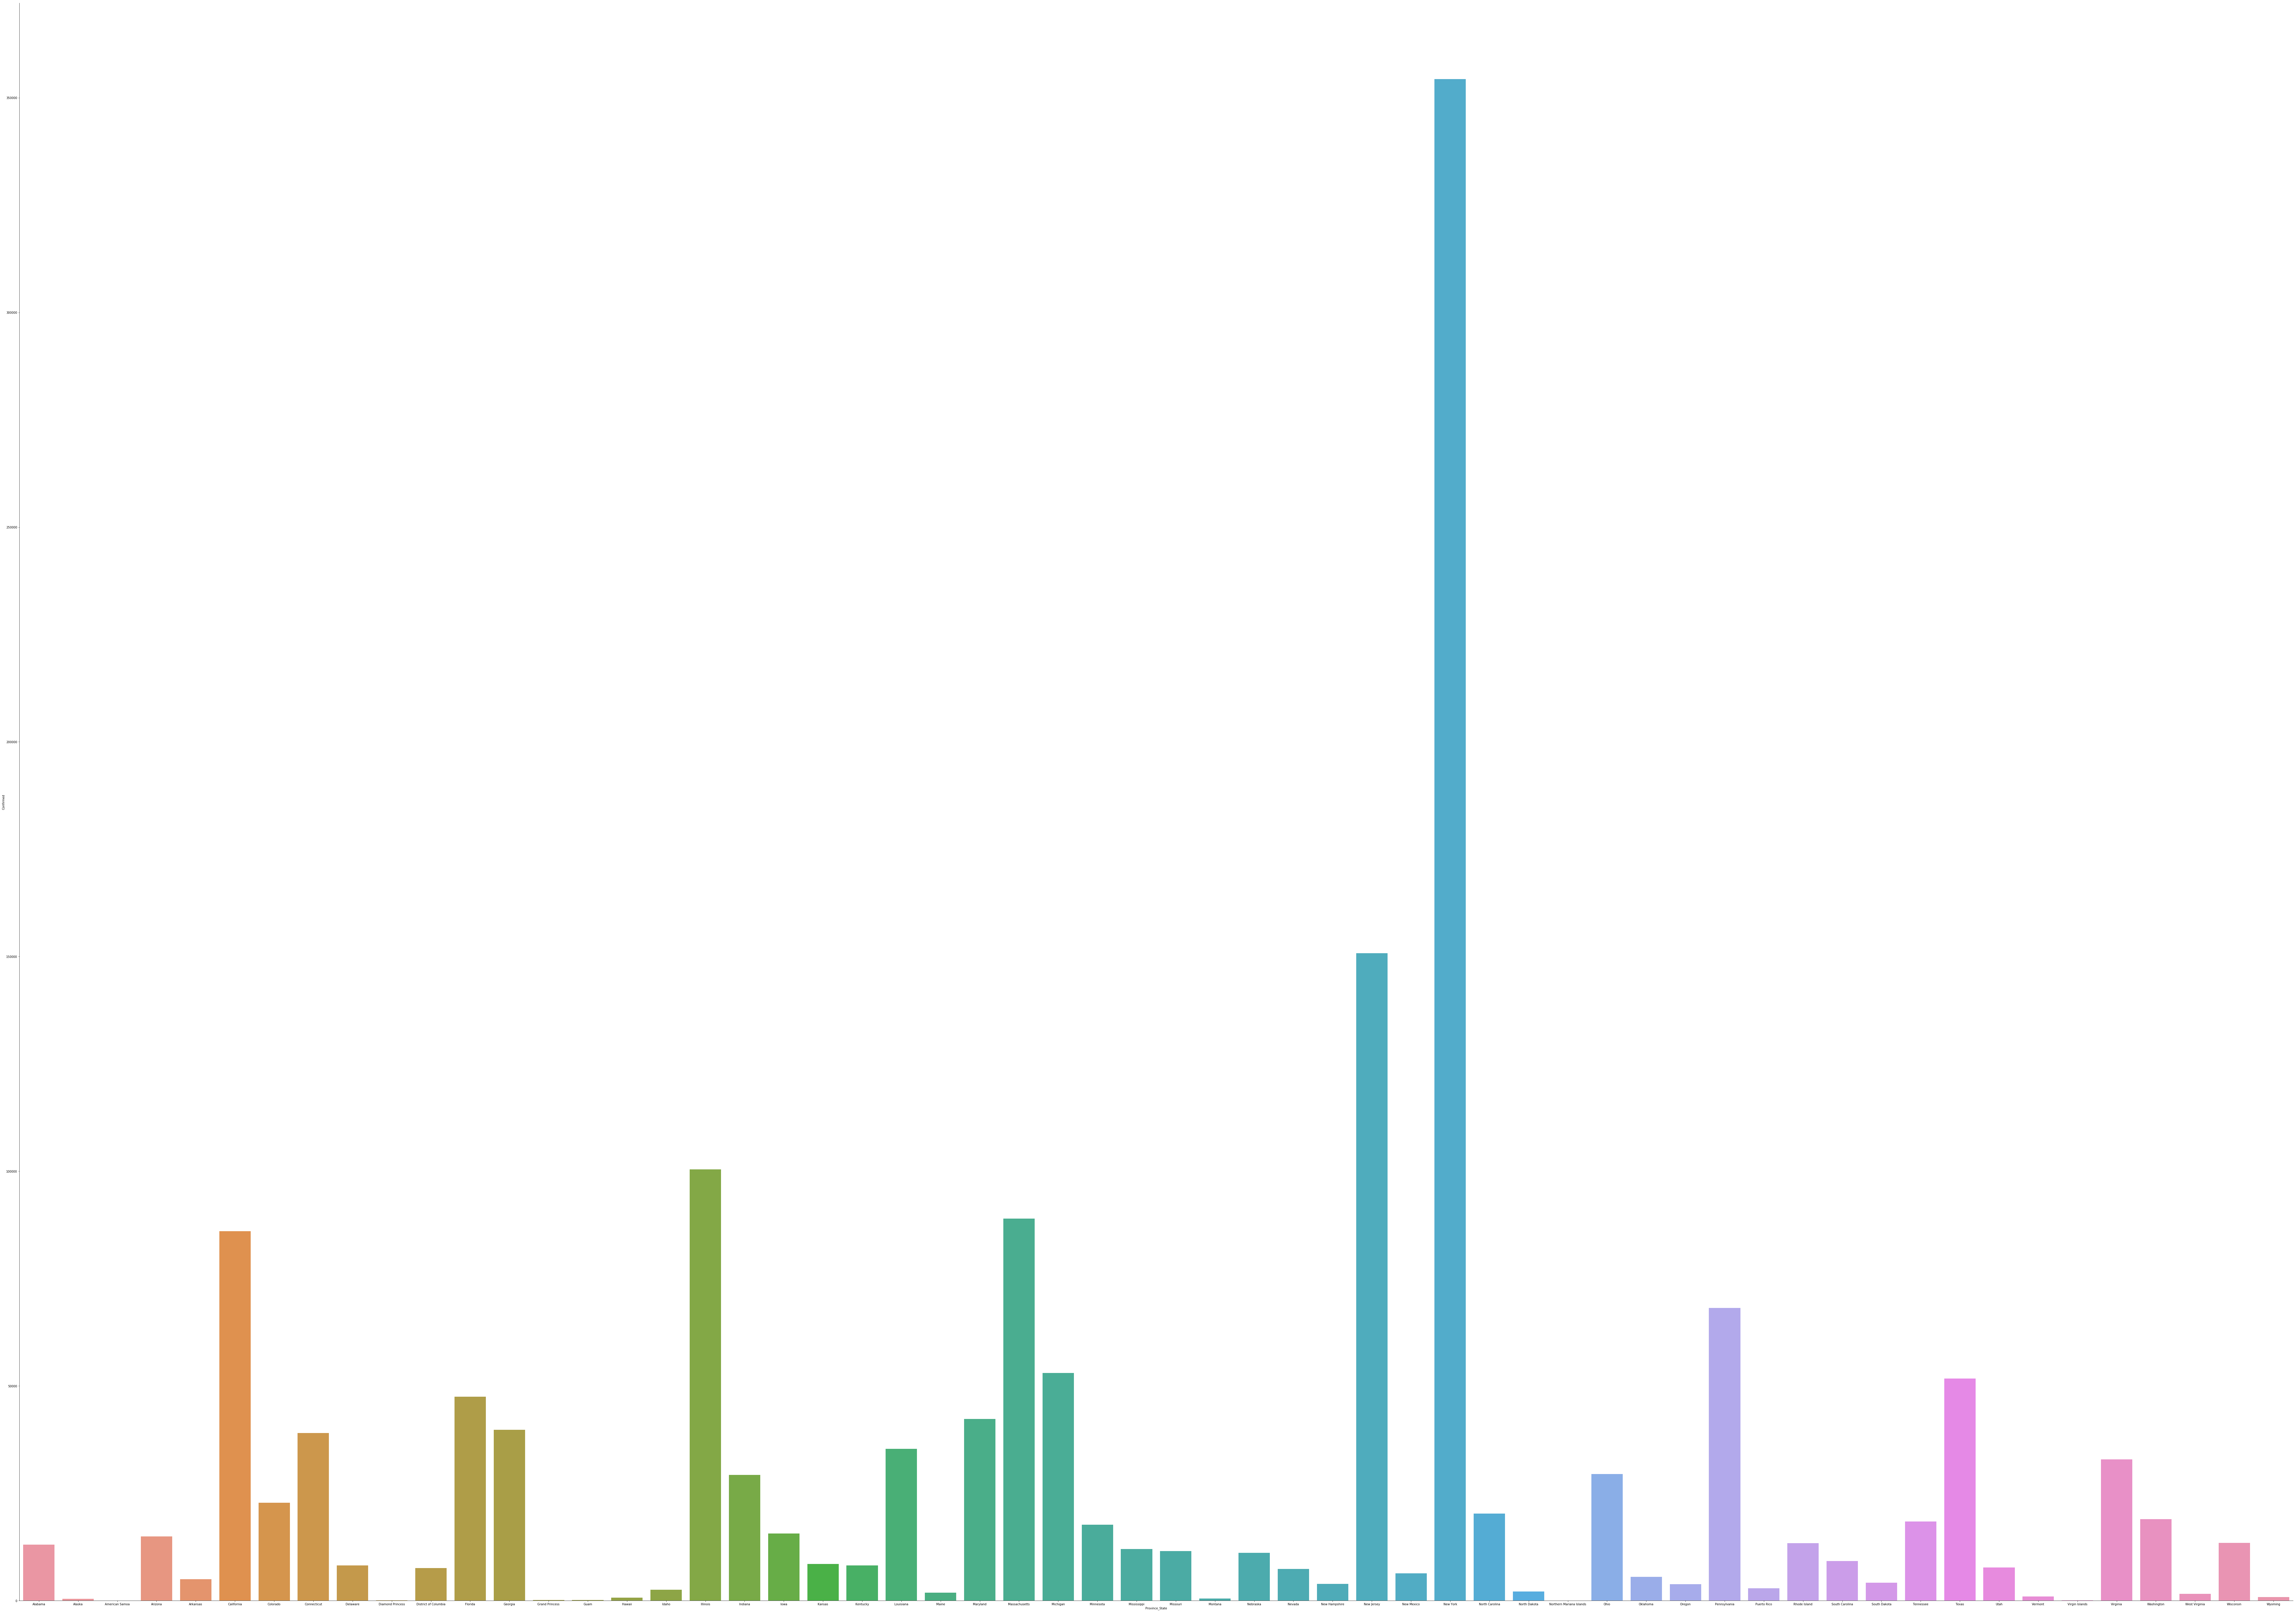

In [10]:
df['Country'] = df['Province_State']
g = sns.catplot(x="Province_State",
                y='Confirmed', 
                data=df,
                label='Province_State',
                kind="bar")
g.fig.set_figwidth(150)
g.fig.set_figheight(90)

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



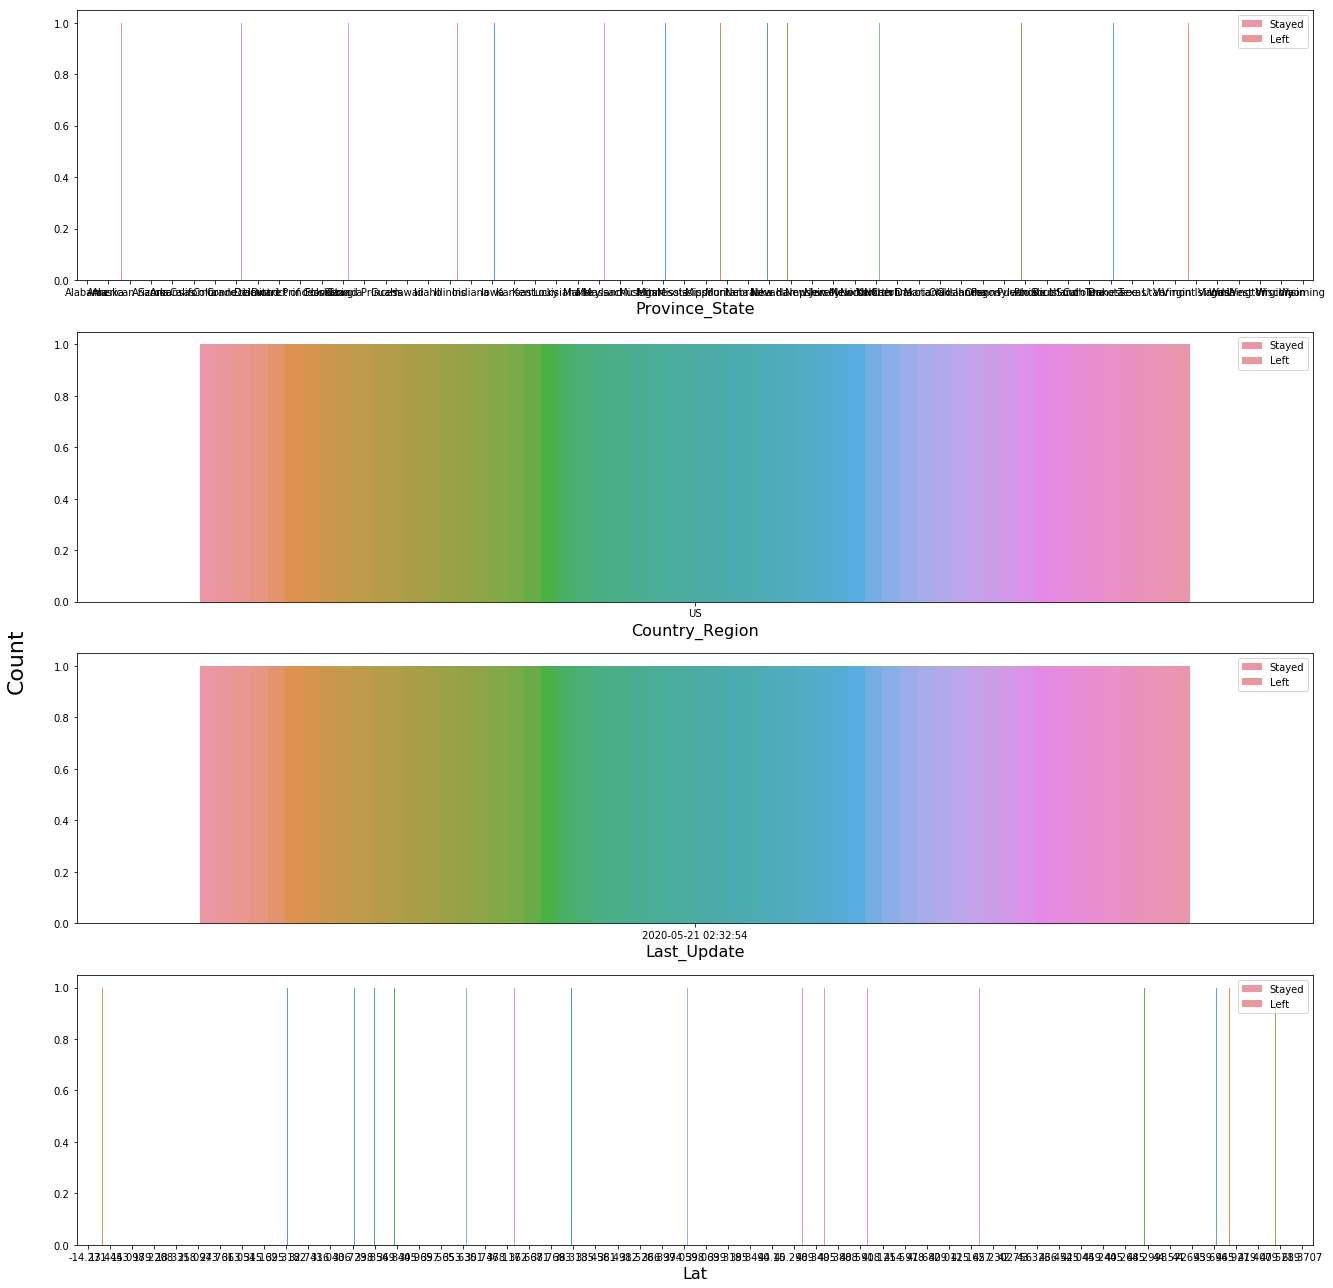

In [11]:
f, axes = plt.subplots(4, 1, figsize=(18,18), tight_layout=True)
x_vars = ['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
        'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='Confirmed', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

C:\Users\GT\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\GT\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



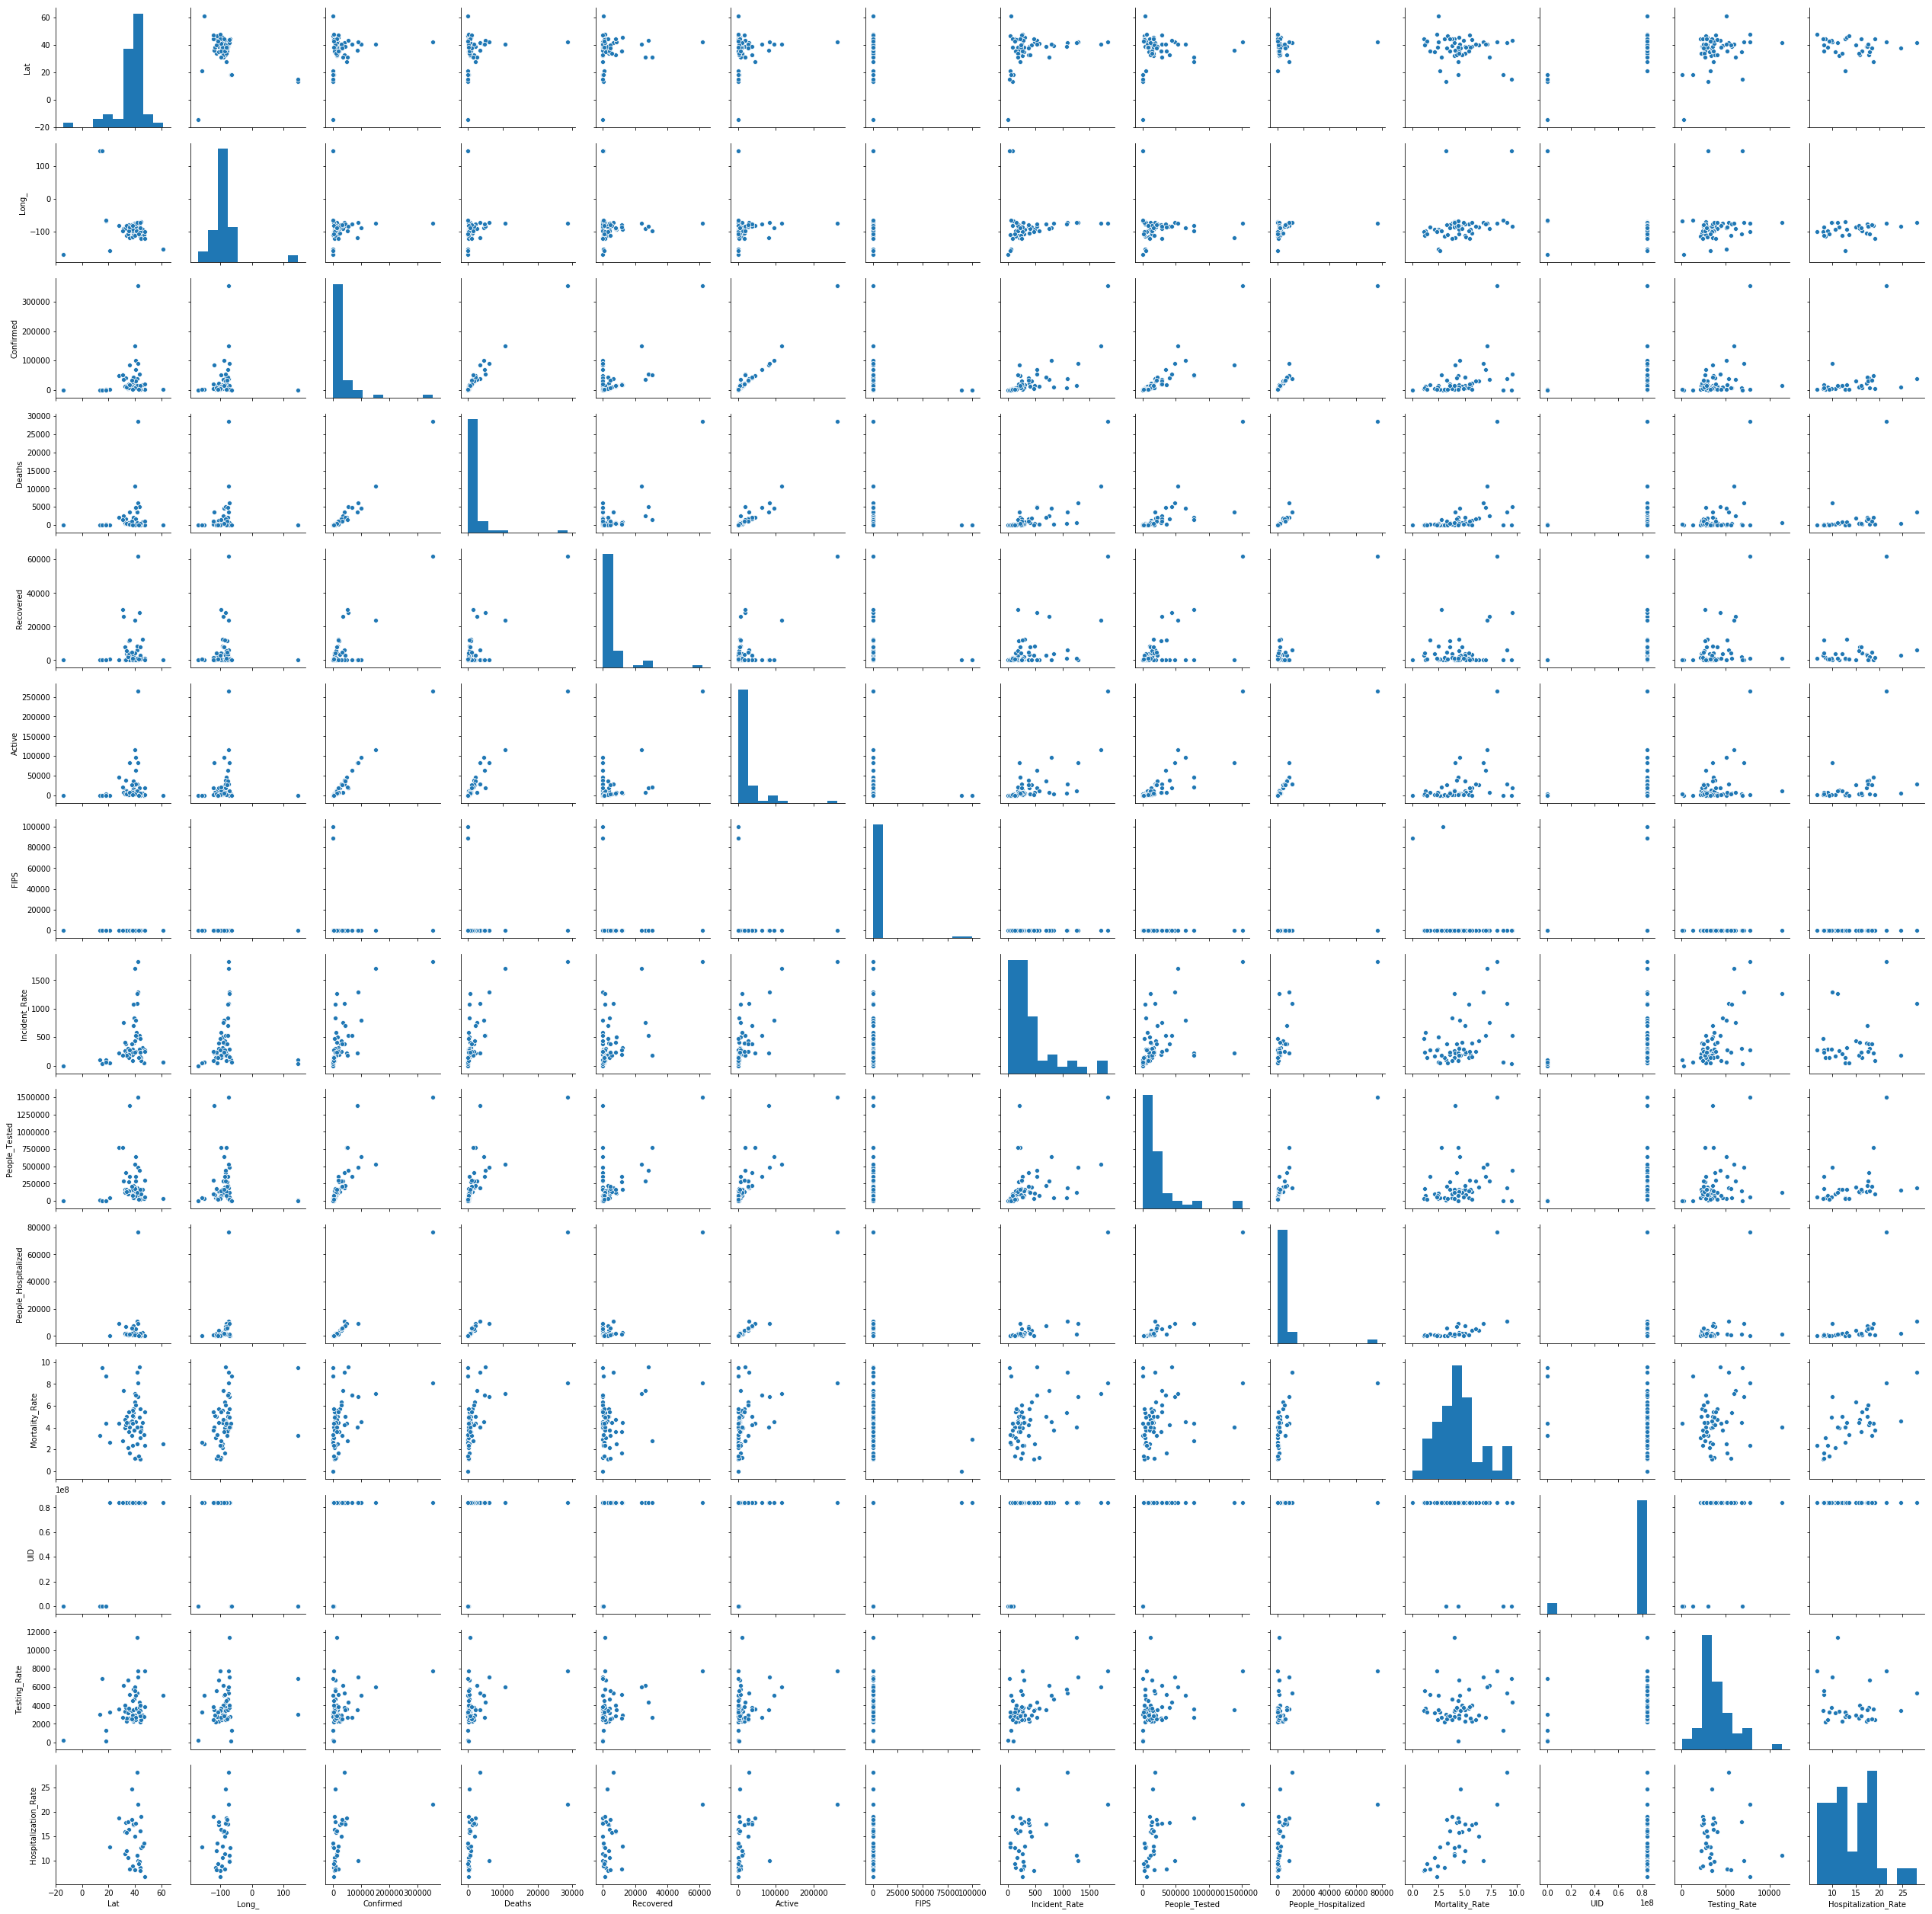

In [12]:
sns.pairplot(df)

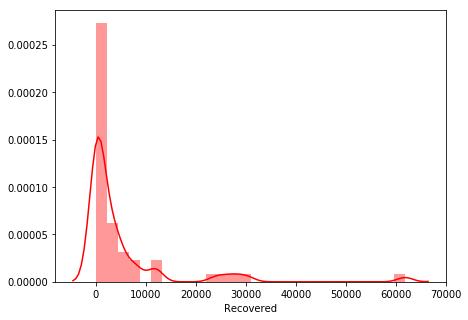

In [23]:
fig, axe = plt.subplots(figsize = [7, 5])
sns.distplot(df['Recovered'], color = 'r');

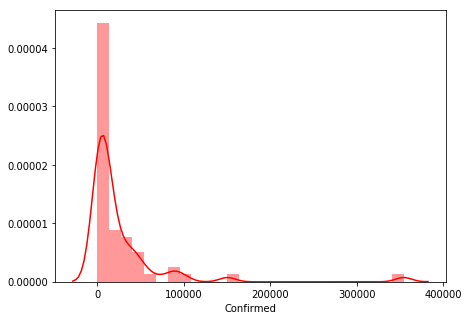

In [13]:
fig, axe = plt.subplots(figsize = [7, 5])
sns.distplot(df['Confirmed'], color = 'r');

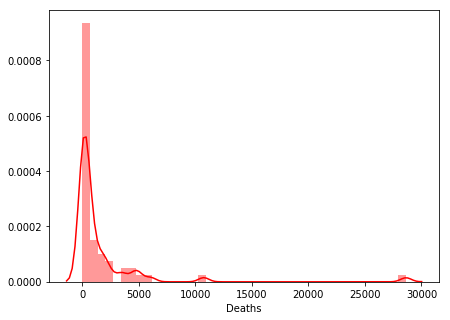

In [14]:
fig, axe = plt.subplots(figsize = [7, 5])
sns.distplot(df['Deaths'], color = 'r');

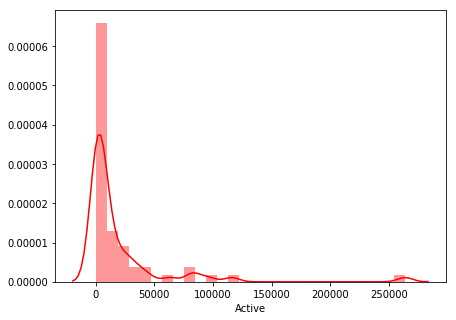

In [15]:
fig, axe = plt.subplots(figsize = [7, 5])
sns.distplot(df['Active'], color = 'r');

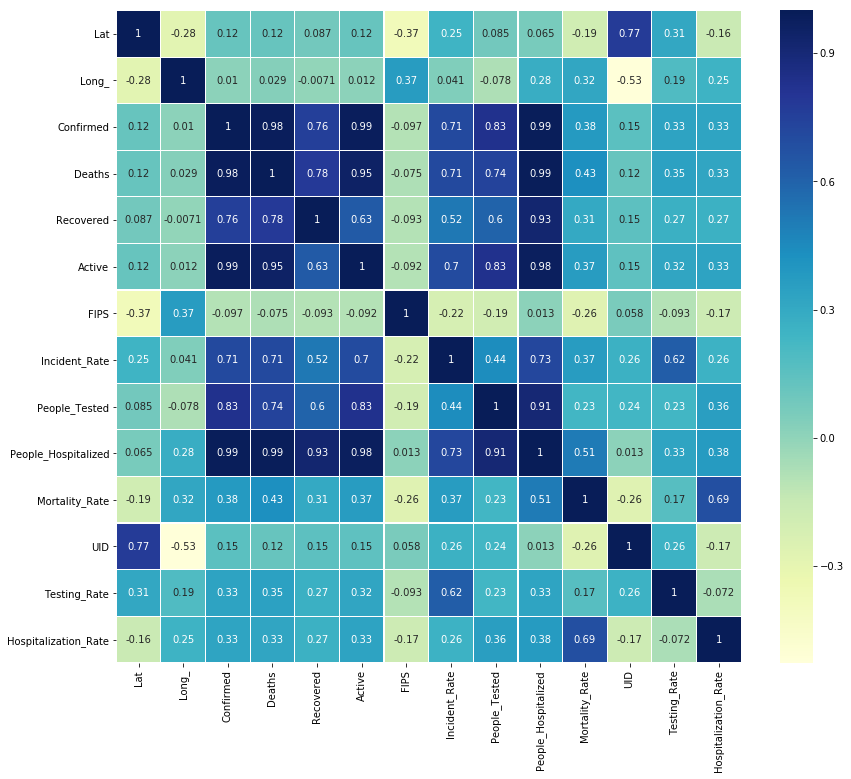

In [16]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [17]:
#Overall 
c= df['Confirmed'].sum()
rvd = df['Recovered'].sum()
dth = df['Deaths'].sum()
ac=c-rvd-dth
fig = go.Figure(data=[go.Pie(labels=['Active','Cured','Death'],
                             values= [ac,rvd,dth],hole =.3)])
fig.update_layout(title_text='Current Situation inWorld India according WHO',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [18]:
outcome = df['Recovered'] + df['Deaths']
r_ = df['Recovered']/outcome * 100
d_ = df['Deaths']/outcome * 100
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Confirmed'], y=r_,mode='lines+markers',marker_color='green',name = 'Recovered'))
fig.add_trace(go.Scatter(x=df['Confirmed'], y=d_,mode='lines+markers',marker_color='red', name = 'Deaths'))
fig.update_layout(title_text = 'Outcome of total closed cases (recovery rate vs death rate)')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.show()

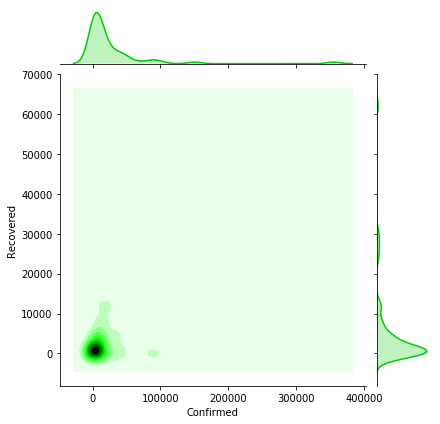

In [19]:
sns.jointplot(df.Confirmed,df.Recovered, color="#00cc00",kind='kde')#density plot

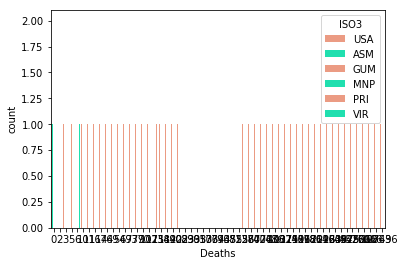

In [20]:
sns.countplot(x = "Deaths", hue = 'ISO3', data = df, palette=["#fc9272",         "#00ffbf"])

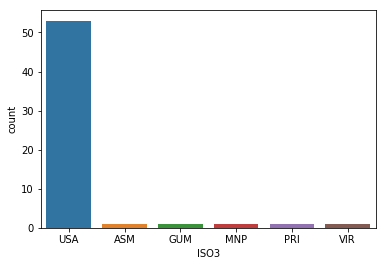

In [21]:
sns.countplot(x = "ISO3", data = df)

In [34]:
df['Confirmed']=pd.to_numeric(df['Confirmed'],errors='coerce')
df['Recovered']=pd.to_numeric(df['Recovered'],errors='coerce')
df['Deaths']=pd.to_numeric(df['Deaths'],errors='coerce')
df['Incident_Rate']=pd.to_numeric(df['Incident_Rate'],errors='coerce')
df['Active']=pd.to_numeric(df['Active'],errors='coerce')
df['People_Hospitalized']=pd.to_numeric(df['People_Hospitalized'],errors='coerce')
df['People_Tested']=pd.to_numeric(df['People_Tested'],errors='coerce')
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [40]:
allCountries = df['Province_State'].unique().tolist()
print(allCountries)

print("\nTotal countries affected by virus: ",len(allCountries))

['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia', 'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

Total countries affected by virus:  58


In [47]:
CountryWiseData = pd.DataFrame(df.groupby('Province_State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum())
CountryWiseData['Province_State'] = CountryWiseData.index
CountryWiseData.index = np.arange(1, len(allCountries)+1)

CountryWiseData = CountryWiseData[['Province_State','Confirmed', 'Deaths', 'Recovered', 'Active']]



In [43]:
CountryWiseData

Province_State  Confirmed  Deaths  Recovered    Active
1                    Alabama      13052     522        0.0   12530.0
2                     Alaska        401      10      352.0      39.0
3             American Samoa          0       0        0.0       0.0
4                    Arizona      14906     747     3773.0   10386.0
5                   Arkansas       5003     107     3852.0    1044.0
6                 California      85997    3497        0.0   82500.0
7                   Colorado      22797    1299     3478.0   18020.0
8                Connecticut      39017    3529     6264.0   29224.0
9                   Delaware       8194     310     3965.0    3919.0
10          Diamond Princess         49       0        0.0      49.0
11      District of Columbia       7551     407     1059.0    6085.0
12                   Florida      47471    2096        0.0   45375.0
13                   Georgia      39801    1697        0.0   38104.0
14            Grand Princess        103       3        0.0     100.0
15                      Guam        154       5      125.0      24.0
16                    Hawaii        643      17      578.0      48.0
17                     Idaho       2506      77     1668.0     761.0
18                  Illinois     100418    4525        0.0   95893.0
19                   Indiana      29274    1864        0.0   27410.0
20                      Iowa      15620     393     8362.0    6865.0
21                    Kansas       8507     202      473.0    7832.0
22                  Kentucky       8167     376     2826.0    4965.0
23                 Louisiana      35316    2608    26249.0    6459.0
24                     Maine       1819      73     1100.0     646.0
25                  Maryland      42323    2123     2993.0   37207.0
26             Massachusetts      88970    6066        0.0   82904.0
27                  Michigan      53009    5060    28234.0   19715.0
28                 Minnesota      17670     786    12227.0    4657.0
29               Mississippi      11967     570     7681.0    3716.0
30                  Missouri      11528     640        0.0   10888.0
31                   Montana        478      16      440.0      22.0
32                  Nebraska      11122     138        0.0   10984.0
33                    Nevada       7388     377      336.0    6675.0
34             New Hampshire       3868     190     1275.0    2403.0
35                New Jersey     150776   10749    23945.0  116082.0
36                New Mexico       6317     283     1882.0    4152.0
37                  New York     354370   28636    61886.0  263848.0
38            North Carolina      20262     726    11637.0    7899.0
39              North Dakota       2095      49     1302.0     744.0
40  Northern Mariana Islands         21       2       13.0       6.0
41                      Ohio      29436    1781        0.0   27655.0
42                  Oklahoma       5532     299     4266.0     967.0
43                    Oregon       3801     144     1406.0    2251.0
44              Pennsylvania      68126    4770        0.0   63356.0
45               Puerto Rico       2866     125        0.0    2741.0
46              Rhode Island      13356     538     1030.0   11788.0
47            South Carolina       9175     407     5451.0    3317.0
48              South Dakota       4177      46     3023.0    1108.0
49                 Tennessee      18412     305    11783.0    6324.0
50                     Texas      51673    1426    30341.0   19906.0
51                      Utah       7710      90     4423.0    3197.0
52                   Vermont        944      54      824.0      66.0
53            Virgin Islands         69       6       61.0       2.0
54                  Virginia      32908    1075     4523.0   27310.0
55                Washington      18971    1037        0.0   17934.0
56             West Virginia       1567      69      950.0     548.0
57                 Wisconsin      13413     481     7728.0    5204.0
58          

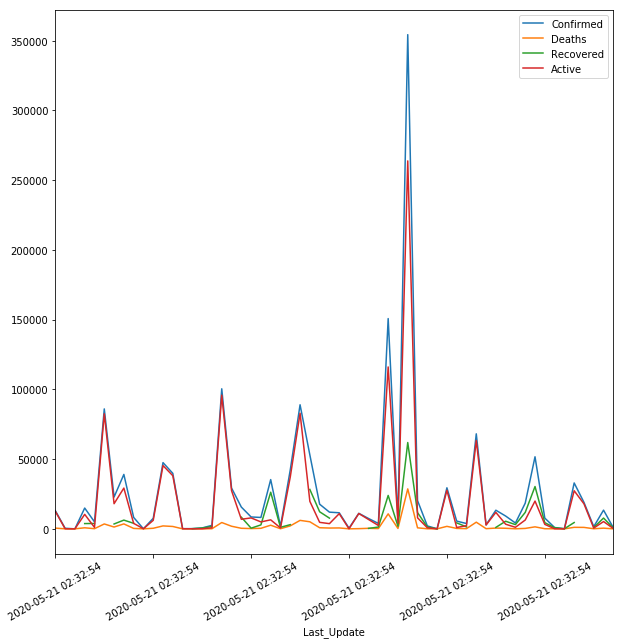

In [49]:
df.plot('Last_Update',['Confirmed', 'Deaths', 'Recovered', 'Active'],figsize=(10,10), rot=30)

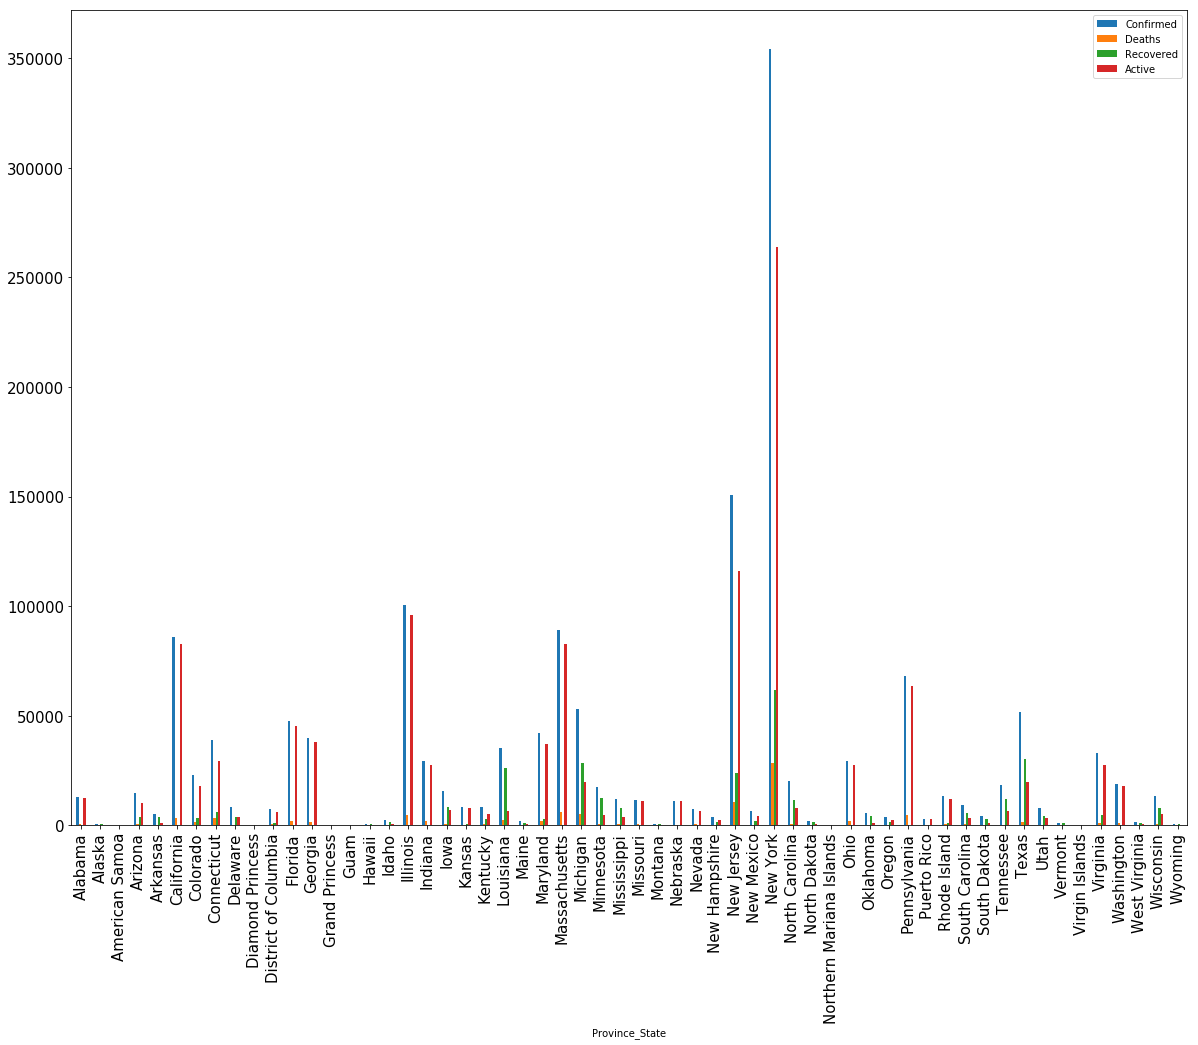

In [61]:
CountryWiseData.plot('Province_State',['Confirmed', 'Deaths', 'Recovered', 'Active'],kind='bar',figsize=(20,15), fontsize=15)

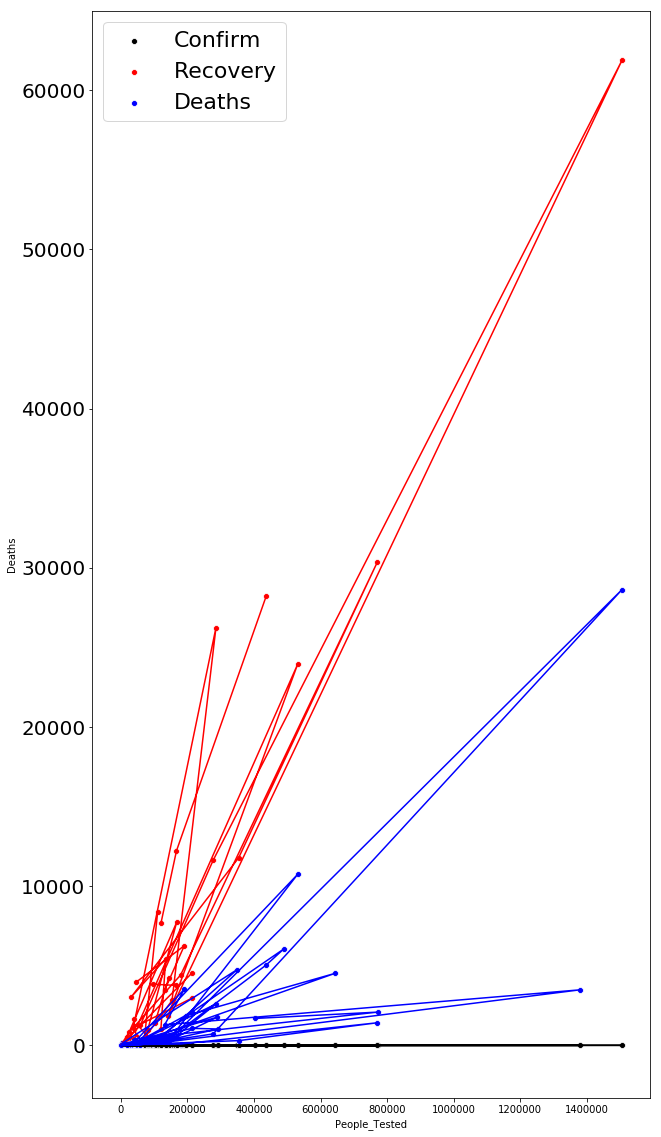

In [78]:
f, ax = plt.subplots(figsize=(10,20))
ax=sns.scatterplot(x="People_Tested", y="Mortality_Rate", data=df,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="People_Tested", y="Recovered", data=df,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="People_Tested", y="Deaths", data=df,
             color="blue",label = "Deaths")
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)

plt.legend(frameon=True, fontsize=22)
plt.plot(df.People_Tested,df.Mortality_Rate,zorder=1,color="black")
plt.plot(df.People_Tested,df.Recovered,zorder=1,color="red")
plt.plot(df.People_Tested,df.Deaths,zorder=1,color="blue")

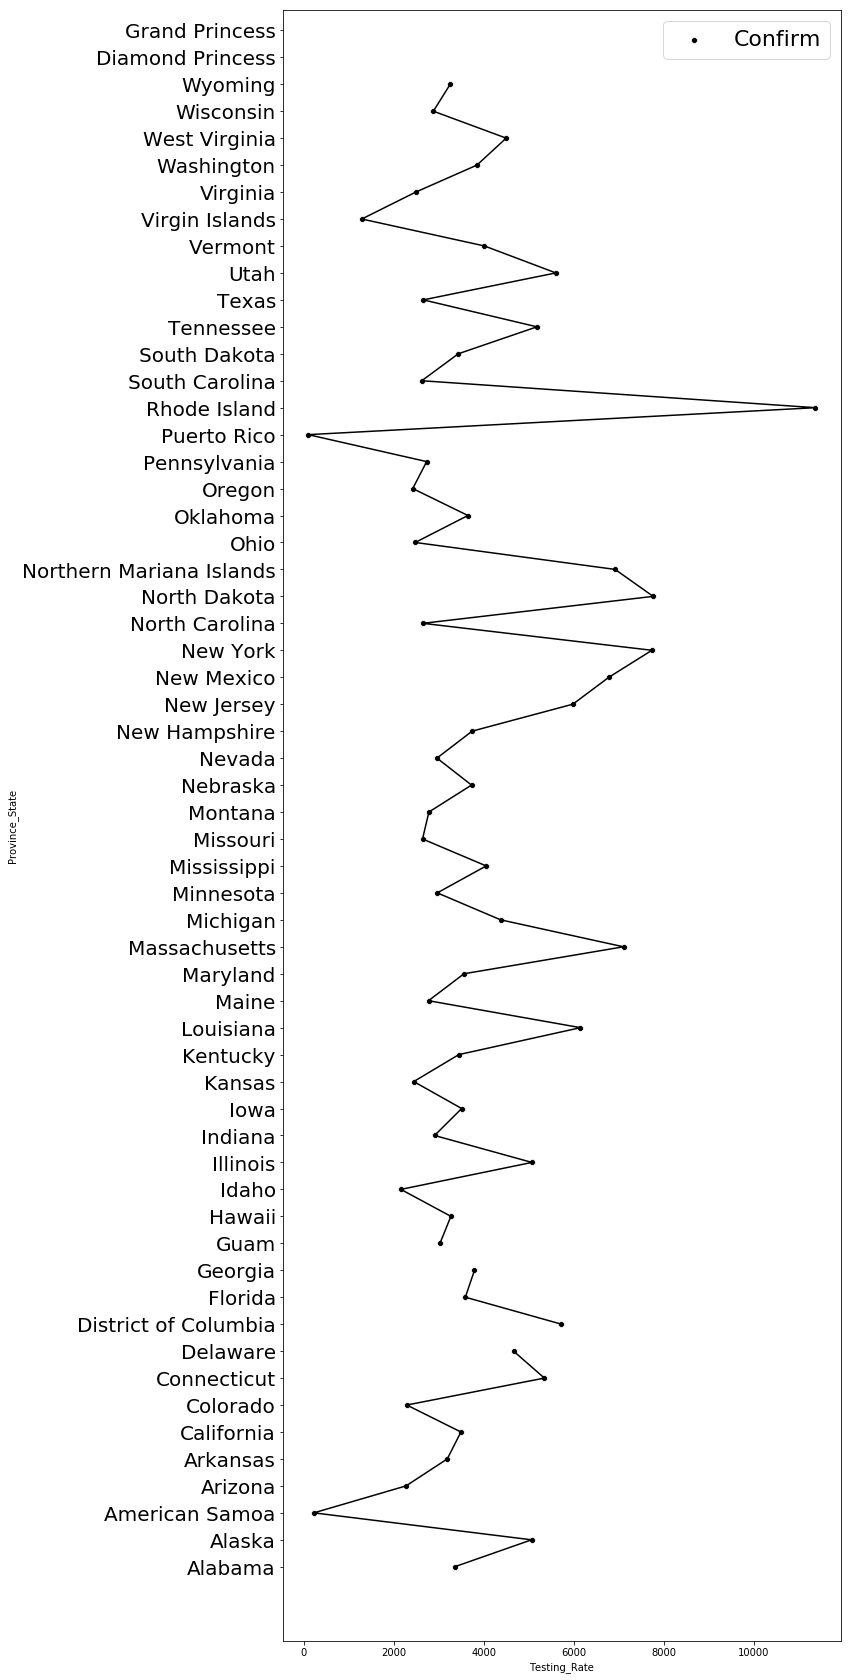

In [69]:

f, ax = plt.subplots(figsize=(10,30))
ax=sns.scatterplot(x="Testing_Rate", y="Province_State", data=df,
             color="black",label = "Confirm")
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)

plt.legend(frameon=True, fontsize=22)
plt.plot(df.Testing_Rate,df.Province_State,zorder=1,color="black")
